# Part I - (Prosper Loan Data)
## by (Gildas Habimana)

## Introduction
The prosper loan dataset has 11393 rows and 81 columns. The data was corrected between 2007 to 2014 from the United States America. It includes various features like the date listing was created, the term of the loan, the loan status, the investors of loan, and the stated monthly income. We will investigate the relationships between various variables.

## Preliminary Wrangling

In [1]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset
pd.set_option('display.max_columns', 82)
loan_df=pd.read_csv('prosperLoanData.csv')

In [3]:
# display first 5 rows
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#shape of dataset
loan_df.shape

(113937, 81)

In [5]:
#checking duplicate rows
sum(loan_df.duplicated())

0

In [6]:
#dataset information summary
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#Checking missing vlues percentages for each variable
loan_df_missing_percentage = loan_df.isnull().sum()/loan_df.shape[0]*100
print(loan_df_missing_percentage.to_string())

ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

### Data Cleaning
<list>Cleaning the dataset before starting exporatory analysis</list>

In [8]:
# Make a copy of  the dataset
loan_df_clean=loan_df.copy()

In [9]:
# Delete columns containing either 25% or more than 25% missing values
cols =loan_df_clean.columns[loan_df_clean.isnull().mean()>0.25]
loan_df_clean=loan_df_clean.drop(cols, axis=1)

In [10]:
#Summarize Information
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   ListingCategory (numeric)           113937 non-null  int64  
 9   BorrowerState                       108422 non-null  object 
 10  Occupation                          110349 non-null  object 
 11  EmploymentStatus          

In [11]:
#Delete rows with null values
loan_df_clean.dropna(inplace=True)

In [12]:
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          94843 non-null  object 
 1   ListingNumber                       94843 non-null  int64  
 2   ListingCreationDate                 94843 non-null  object 
 3   Term                                94843 non-null  int64  
 4   LoanStatus                          94843 non-null  object 
 5   BorrowerAPR                         94843 non-null  float64
 6   BorrowerRate                        94843 non-null  float64
 7   LenderYield                         94843 non-null  float64
 8   ListingCategory (numeric)           94843 non-null  int64  
 9   BorrowerState                       94843 non-null  object 
 10  Occupation                          94843 non-null  object 
 11  EmploymentStatus                    9484

In [13]:
#Displying 5 rows of dataset
loan_df_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,0.1214,1,NM,Professional,Employed,82.0,True,False,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,0,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [14]:
# Change columns data type
loan_df_clean["ListingCreationDate"] = pd.to_datetime(loan_df_clean["ListingCreationDate"])
loan_df_clean["DateCreditPulled"] = pd.to_datetime(loan_df_clean["DateCreditPulled"])
loan_df_clean["FirstRecordedCreditLine"] = pd.to_datetime(loan_df_clean["FirstRecordedCreditLine"])
loan_df_clean["LoanOriginationDate"] = pd.to_datetime(loan_df_clean["LoanOriginationDate"])


In [15]:
# Check the changed data type
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94843 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingKey                          94843 non-null  object        
 1   ListingNumber                       94843 non-null  int64         
 2   ListingCreationDate                 94843 non-null  datetime64[ns]
 3   Term                                94843 non-null  int64         
 4   LoanStatus                          94843 non-null  object        
 5   BorrowerAPR                         94843 non-null  float64       
 6   BorrowerRate                        94843 non-null  float64       
 7   LenderYield                         94843 non-null  float64       
 8   ListingCategory (numeric)           94843 non-null  int64         
 9   BorrowerState                       94843 non-null  object        
 10  Occupation           

### What is the structure of your dataset?

>The origina Dataset has 81 variables and 113937 rows and after the cleaned the dataset has 94843 rows and 68 columns.

### What is/are the main feature(s) of interest in your dataset?

> Loan status, Term, EmploymentStatus, BorrowerRate,, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount and Investors

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Occupation andEmploymentStatusDuration

## Univariate Exploration

<strong>1)What are the statuses of loans?</strong>

In [16]:
loan_status_counts=loan_df_clean.shape[0]
max_loan_status_type=loan_df_clean['LoanStatus'].value_counts()[0]
max_proportion=max_loan_status_type/loan_status_counts
max_proportion
tick_props=np.arange(0,max_proportion,0.06)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

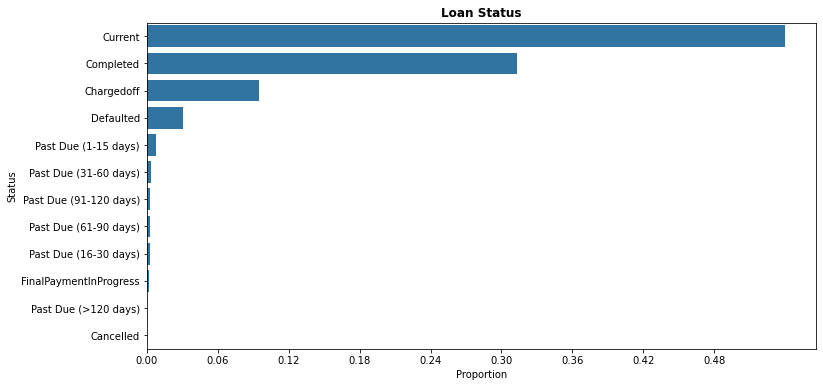

In [17]:
plt.figure(figsize=(12,6))
base_color=sb.color_palette()[0]
order=loan_df_clean['LoanStatus'].value_counts().index
sb.countplot(data=loan_df_clean, y='LoanStatus', color=base_color, order=order);
# Change the tick locations and labels
plt.xticks(tick_props * loan_status_counts, tick_names)
plt.xlabel('Proportion');
plt.ylabel('Status');
plt.title('Loan Status', fontweight='bold')
plt.show()

<strong>The graph above shows that the majority of loans are still active, and it shows that borrowers are willing to pay because many people have completed paying their loans, and it also shows that few people fail to meet their deadlines to complete to pay the debt. </strong>

<strong>2) What is the most term given to the borrowers?</strong>

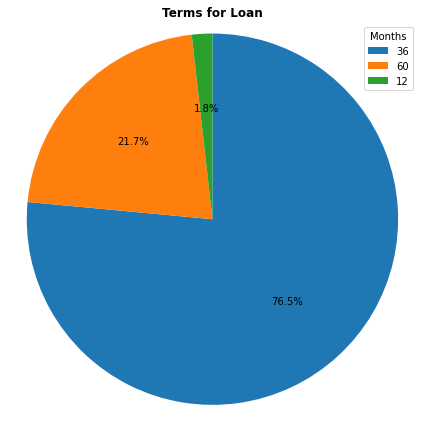

In [49]:
plt.figure(figsize=(6,6))
x=loan_df_clean['Term'].value_counts()
explode = [0,0,0]
labels =x.index
plt.pie(x, startangle=90,explode=explode,autopct='%.1f%%', counterclock=False)
plt.title("Terms for Loan", fontweight='bold')
plt.axis('equal')
plt.legend(labels,title='Months')
plt.tight_layout()
plt.show()

<strong>According to the graph above, 76.5% of loans given to clients have a repayment term of three years, 21.7% have a period of five years, and 1.8% have a period of one year.</strong>

<strong> 3)What is the employment status of borrowers? </strong>

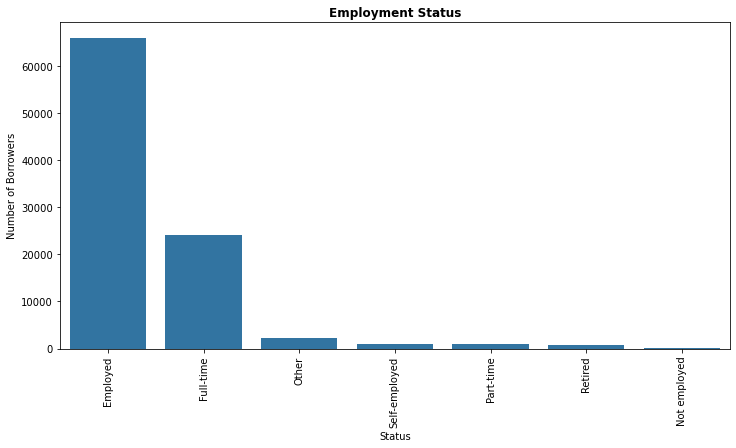

In [19]:
plt.figure(figsize=(12,6))
base_color=sb.color_palette()[0]
order=loan_df_clean['EmploymentStatus'].value_counts().index
sb.countplot(data=loan_df_clean, x='EmploymentStatus', color=base_color, order=order);
plt.xticks(rotation=90)
## Labeling the axes
plt.xlabel('Status')
plt.ylabel('Number of Borrowers')
plt.title('Employment Status', fontweight='bold')
plt.show()

<strong>
According to the graph above, most borrowers are employed or have full-time jobs. Furthermore, it shows how few loans are given to self-employed, part-time employees, retired, or jobless, indicating that banks prefer lending money to employed people over those in other statuses.</strong>

<strong>4) What is the income range of borrowers? </strong>

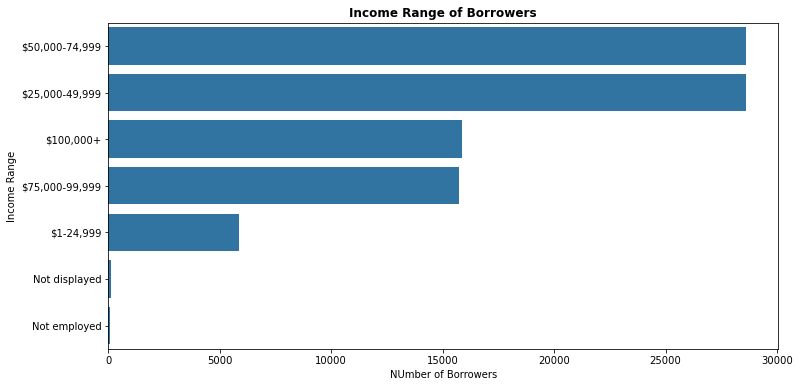

In [20]:
plt.figure(figsize=(12,6))
base_color=sb.color_palette()[0]
order=loan_df_clean['IncomeRange'].value_counts().index
sb.countplot(data=loan_df_clean, y='IncomeRange',color=base_color,order=order);
plt.title('Income Range of Borrowers',fontweight='bold')
plt.xlabel('NUmber of Borrowers')
plt.ylabel('Income Range')
plt.show()

<strong>The graph above shows that 50,000-74,999 is the most income range for borrowers, followed by   25,000-49,999. Also, it shows that few borrowers are without employment.</strong> 

<strong>5)What are the top 10 states of borrowers?</strong>

In [21]:
a=loan_df_clean['BorrowerState'].value_counts().head(10)

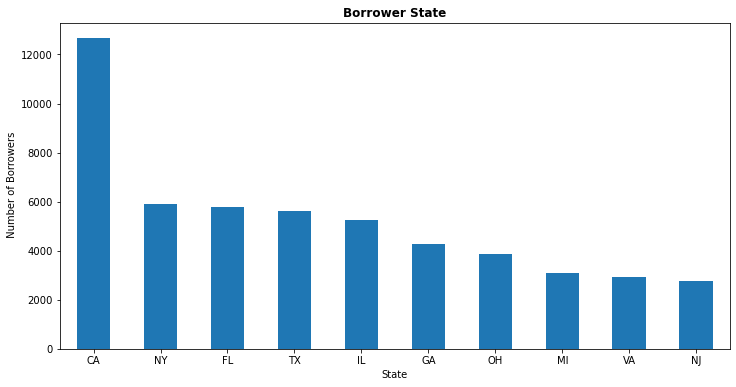

In [22]:
plt.figure(figsize=(12,6))
a.plot(kind='bar')
plt.title("Borrower State",fontweight='bold')
plt.xlabel("State")
plt.ylabel(" Number of Borrowers")
plt.xticks(rotation=0)
plt.show()

<strong>The above graph shows that most of borrowers come from CA followed by NY and FL.</strong>

<strong>6)What are The top 10 occupation of borrowers?</strong>

In [23]:
a=loan_df_clean['Occupation'].value_counts().head(10)
a

Other                       23334
Professional                12119
Computer Programmer          3909
Executive                    3813
Teacher                      3435
Analyst                      3339
Administrative Assistant     3329
Accountant/CPA               2900
Clerical                     2719
Sales - Commission           2684
Name: Occupation, dtype: int64

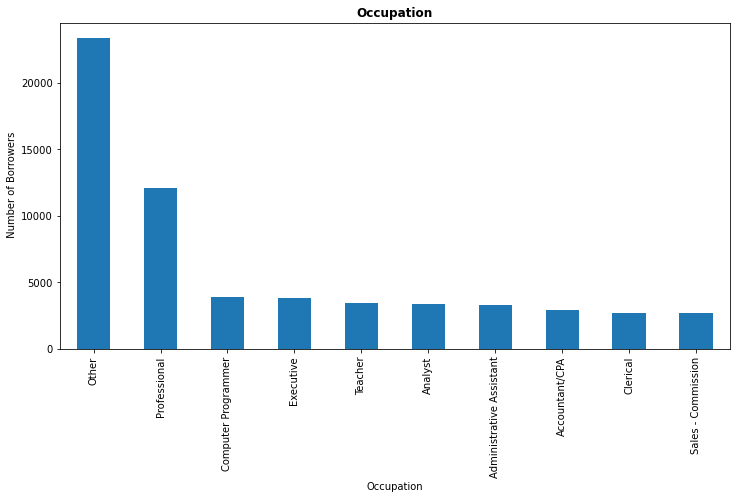

In [24]:
plt.figure(figsize=(12,6))
a.plot(kind='bar')
plt.title("Occupation",fontweight='bold')
plt.xlabel("Occupation")
plt.ylabel(" Number of Borrowers")
plt.xticks(rotation=90)
plt.show()

<strong>According to the graph most of borrowers their job type is not known followed by professional, and Computer Programmer.</strong>

<strong>7) What are the employment dration of borrowers?</strong>

In [25]:
loan_df_clean = loan_df_clean.loc[loan_df_clean["EmploymentStatusDuration"]<200]

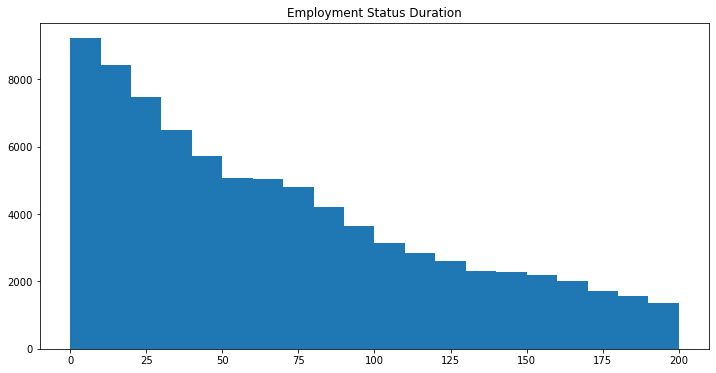

In [26]:
plt.figure(figsize=(12,6))
w=10
bins = np.arange(0, loan_df_clean['EmploymentStatusDuration'].max()+w, w)
plt.hist(data = loan_df_clean, x = 'EmploymentStatusDuration',bins=bins);
plt.title('Employment Status Duration')
#plt.xlim((0,600));
plt.show()

<strong>The graph shows that the data are right skewed, indicating that the employees have short employment contract  and that there few people with long-term employment. </strong>

<strong>8)What is distribution of borrower rate?</strong>

In [27]:
loan_df_clean = loan_df_clean.loc[loan_df_clean["BorrowerRate"]>0.03]

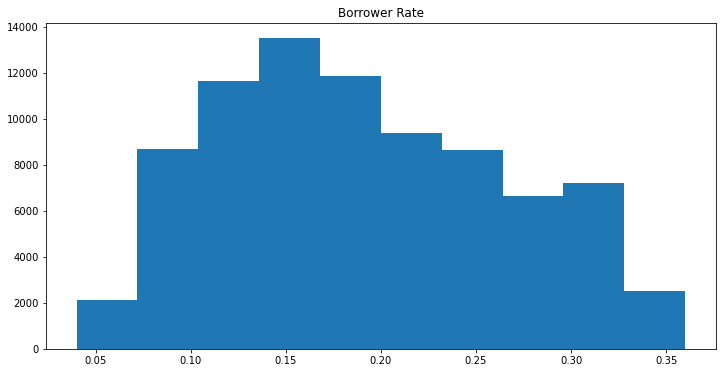

In [28]:
plt.figure(figsize=(12,6))
w=0.01
bins = np.arange(loan_df_clean['BorrowerRate'].min(), loan_df_clean['BorrowerRate'].max()+w, w)
plt.hist(data=loan_df_clean, x='BorrowerRate')
plt.title('Borrower Rate')
plt.show()

<strong>The graph shows that borrower rate data is normally distributed, implying that the most common borrower rate for the loans is between 0.15 and 0.20.</strong> 

<strong>9)What are the number of investors for loan?<strong>

In [29]:
loan_df_clean = loan_df_clean.loc[loan_df_clean["Investors"] < 150]

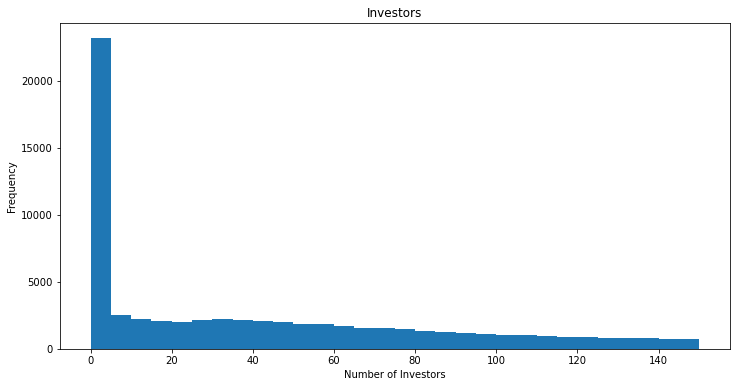

In [30]:
plt.figure(figsize=(12,6))
w=5
bins = np.arange(0, loan_df_clean['Investors'].max()+w, w)
plt.hist(data=loan_df_clean, x='Investors',bins=bins);
plt.title('Investors')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.show()

<strong>The above graph shows that data are right skewed and most of loans have between 0 and 5 investors.</strong>

<strong>10) What is the loan amount given to the borrowers?</strong>

In [31]:
loan_df_clean = loan_df_clean.loc[loan_df_clean["LoanOriginalAmount"] < 19000]

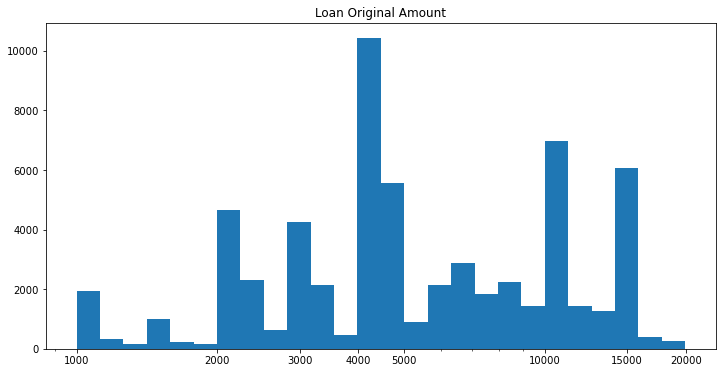

In [32]:
plt.figure(figsize=(12,6))
w=0.05
bins = 10**np.arange(np.log10(loan_df_clean['LoanOriginalAmount'].min()), np.log10(loan_df_clean['LoanOriginalAmount'].max())+w, w)
ticks=[1000,2000,4000,3000,5000, 10000,15000,20000]
labels=['{}'.format(v) for v in ticks]
plt.hist(data=loan_df_clean, x='LoanOriginalAmount', bins=bins);
plt.title('Loan Original Amount')
plt.xscale('log')
plt.xticks(ticks, labels);
plt.show()

<strong>The Above graph shows that data does not have a formal distribution. Also, it shows that between 4000 and 5000 is the range of loans given to the borrowers.</strong>

<strong>11) What are monthly income of borrowers?<strong>

In [33]:
loan_df_clean = loan_df_clean.loc[loan_df_clean["StatedMonthlyIncome"] < 11000]

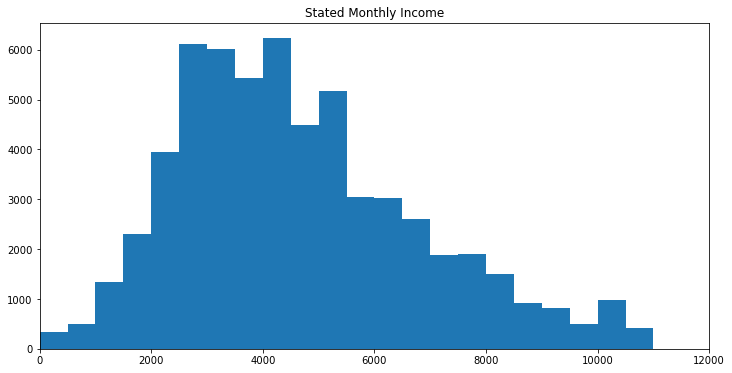

In [34]:
plt.figure(figsize=(12,6))
w=500
bins = np.arange(0, loan_df_clean['StatedMonthlyIncome'].max()+w, w)
plt.hist(data=loan_df_clean, x='StatedMonthlyIncome',bins=bins)
plt.title('Stated Monthly Income')
plt.xlim(0,12000)
plt.show()

<strong>The graph shows that monthly income data are normally distributed, with the majority of borrowers earning between 4000 and 4500 per month. It also shows that few people earn more than 10000 per month.</strong>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>After removing outliers, the variables for Stated Monthly Income and Borrower Rate are normally distributed, whereas the variable for Loan Original Amount does not have a formal distribution after log transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  The variables Investors and Employment Status Duration are skewed to the right. Yes, the outliers have been removed. It will aid in determining the relationship between those variables and other variables.

## Bivariate Exploration

<strong>1)What is the correlation between loan amount and borrower rate?</strong>

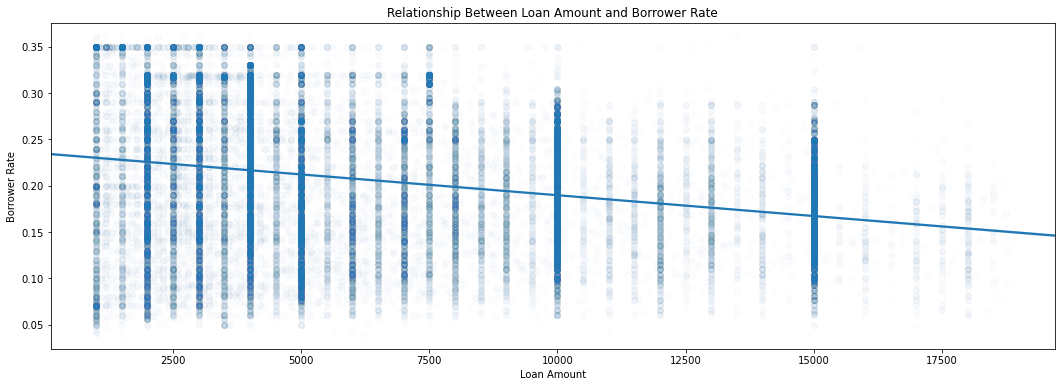

In [35]:
plt.figure(figsize=(18,6))
sb.regplot(data=loan_df_clean, y='BorrowerRate',x='LoanOriginalAmount', x_jitter=0.05,scatter_kws={'alpha':1/100},truncate=False);
plt.title('Relationship Between Loan Amount and Borrower Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower Rate')
plt.show()

<strong>The graph above shows a negative relationship between loan amount and borrower rate, indicating that a large amount of  the loan, the lower the borrower rate.</strong>

<strong>2)What is the correlation between loan amount and Stated Monthly Income?</strong>

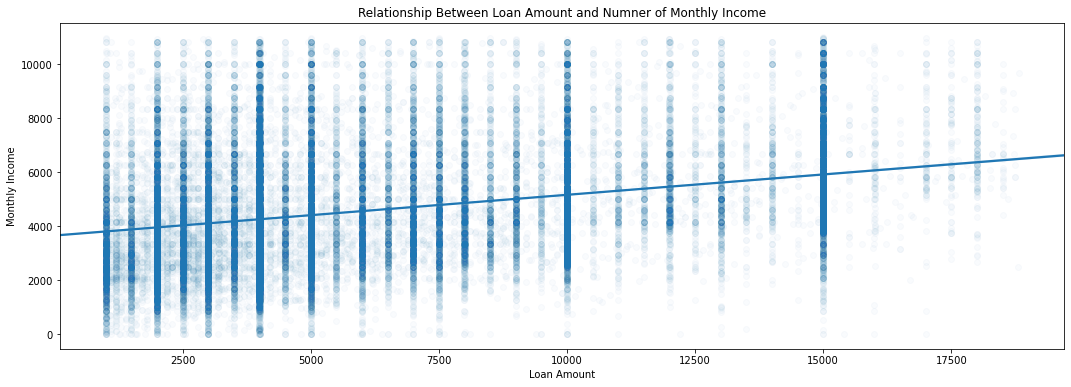

In [36]:
plt.figure(figsize=(18,6))
sb.regplot(data=loan_df_clean, y='StatedMonthlyIncome',x='LoanOriginalAmount', x_jitter=0.3,scatter_kws={'alpha':1/40},truncate=False);
plt.title('Relationship Between Loan Amount and Numner of Monthly Income')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income')
plt.show()

<strong>The graph shows a positive relationship between the loan amount and monthly income. That implies that the higher your income, the larger the loan you will receive from the bank.</strong>

<strong>3)What is the correlation between loan amount and Term?</strong>

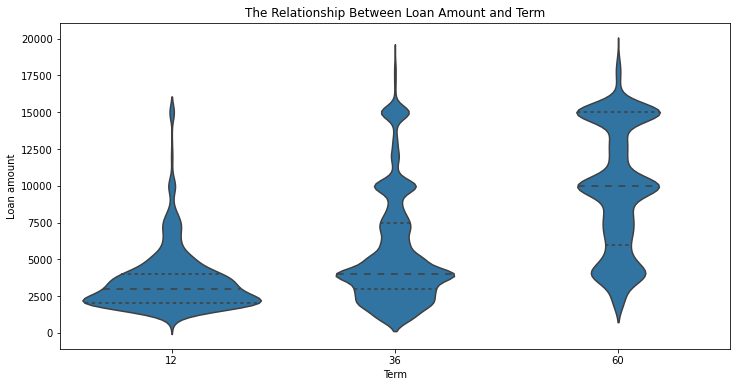

In [37]:
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.violinplot(data=loan_df_clean, x='Term', y='LoanOriginalAmount', color=base_color, inner='quartile');
plt.xlabel('Term')
plt.ylabel('Loan amount')
plt.title('The Relationship Between Loan Amount and Term')
plt.show()

<strong>The graph above shows a correlation between loan amount and term, which indicates a large amount of loan, the more time given to pay back the loan.</strong>

<strong>4)What is the correlation between Employment Status Duration and Income Range?</strong>

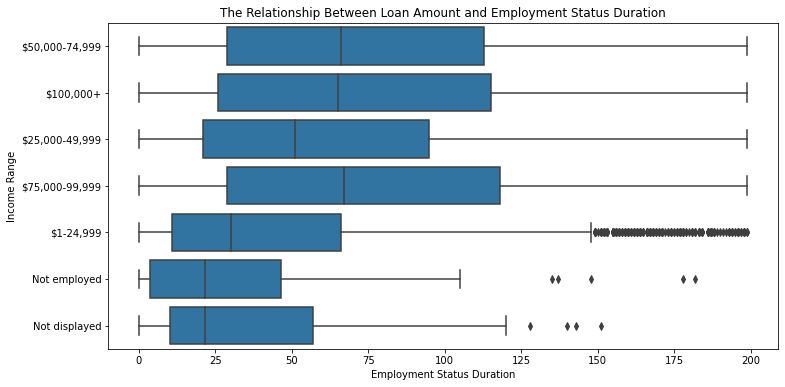

In [38]:
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.boxplot(data=loan_df_clean, x='EmploymentStatusDuration', y='IncomeRange' , color=base_color);
plt.xlabel('Employment Status Duration')
plt.ylabel('Income Range')
plt.title('The Relationship Between Loan Amount and Employment Status Duration')
plt.show()

<strong>The graph above shows that people who make more than $50000 have contracts that are longer in duration than other people. 
That implies that those with longer employment contracts make more money than those with shorter contracts. 
Additionally, there are outliers in every income range, which means that some people can make more money with temporary employment.</strong>  

<strong>4)What is the relationship between Income and Employment Status?</strong>

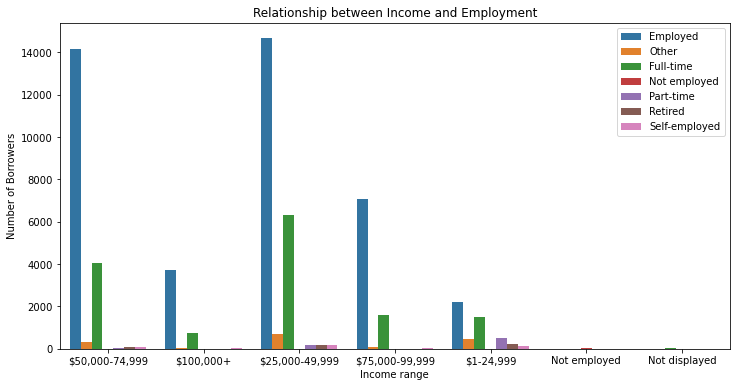

In [39]:
plt.figure(figsize=(12,6))
sb.countplot(data = loan_df_clean, x = 'IncomeRange', hue = 'EmploymentStatus');
plt.legend(loc='upper right')
plt.title('Relationship between Income and Employment')
plt.xlabel('Income range')
plt.ylabel('Number of Borrowers')
plt.show()

<strong>The graph shows that employed borrowers make up a majority of other borrowers' categories in each income range.</strong>

<strong>5) What is the relationship between the unpaid loan status and income range?</strong>

In [40]:
loan_df_clean_sub = loan_df_clean.loc[loan_df_clean['LoanStatus'].isin(['Past Due (>120 days)', 'Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (16-30 days)'])]

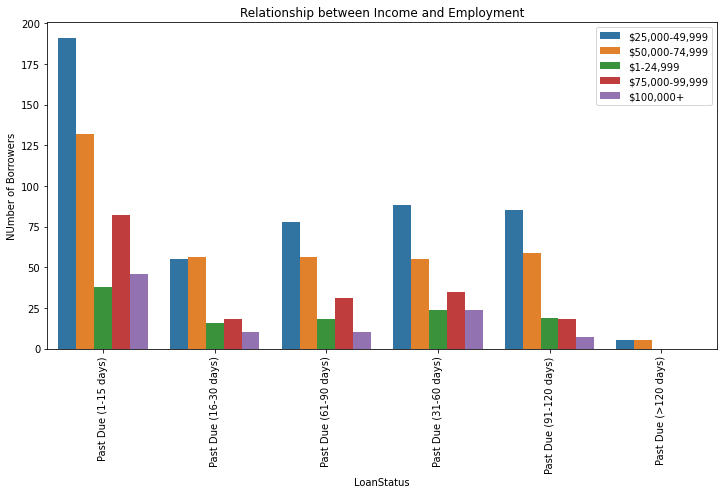

In [41]:
plt.figure(figsize=(12,6))
sb.countplot(data = loan_df_clean_sub, x = 'LoanStatus', hue = 'IncomeRange');
plt.legend(loc='upper right')
plt.title('Relationship between Income and Employment')
plt.xlabel('LoanStatus')
plt.ylabel('NUmber of Borrowers')
plt.xticks(rotation=90)
plt.show()

<strong>The graph shows that borrowers whose income range between 25000 and 49999 have failed to pay back on time more than other borrowers. </strong>

<strong>6)What is the relationship between Loan Status and Stated Monthly Income</strong>

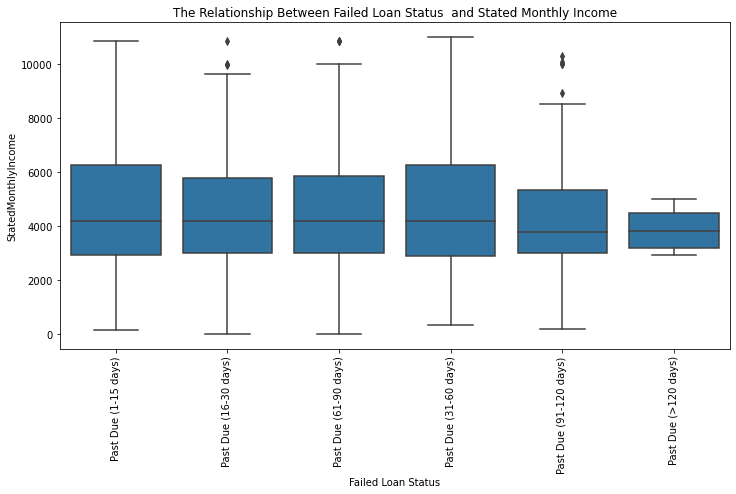

In [42]:
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.boxplot(data=loan_df_clean_sub, x='LoanStatus', y='StatedMonthlyIncome' , color=base_color);
plt.xlabel('Failed Loan Status')
plt.ylabel('StatedMonthlyIncome')
plt.title('The Relationship Between Failed Loan Status  and Stated Monthly Income')
plt.xticks(rotation=90)
plt.show()

<strong>This graph shows that the majority of borrowers who failed to pay their loans on time had an average loan amount of $4000.</strong>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>We found that some variables have a strong positive relationship and others have a negative relationship. There is a strong positive relationship between the loan amount and stated monthly income. There is a negative relationship between borrower rate and loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>We found that the borrowers who failed to pay back have low earning income.

## Multivariate Exploration

<strong>1) What is the relationship between loan original amount,investors, and borrower rate variables?</strong>

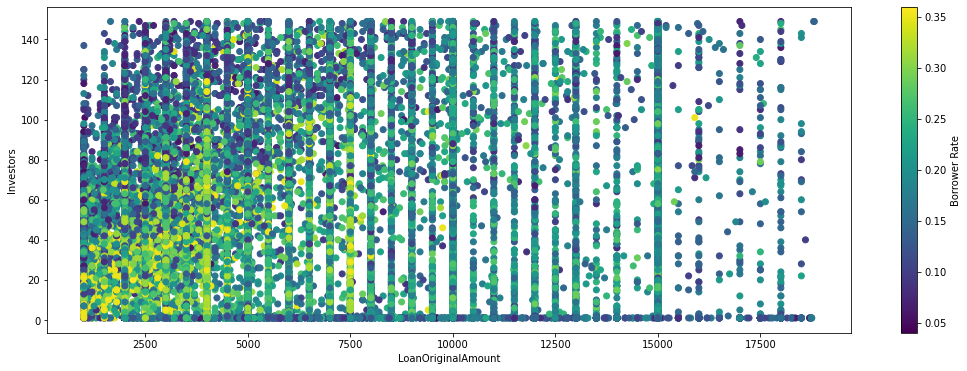

In [43]:
plt.figure(figsize=(18,6))
plt.scatter(data = loan_df_clean, x= 'LoanOriginalAmount', y = 'Investors', c = 'BorrowerRate');
plt.colorbar(label='Borrower Rate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Investors')
plt.show()

<strong>The graph above shows that small loans have a high borrowing rate compared to the higher loan.</strong>

<strong>2) What is the relationship between multiple variables?<strong>

In [44]:
df=loan_df_clean[['BorrowerRate','Investors','StatedMonthlyIncome','EmploymentStatusDuration','LoanOriginalAmount']]

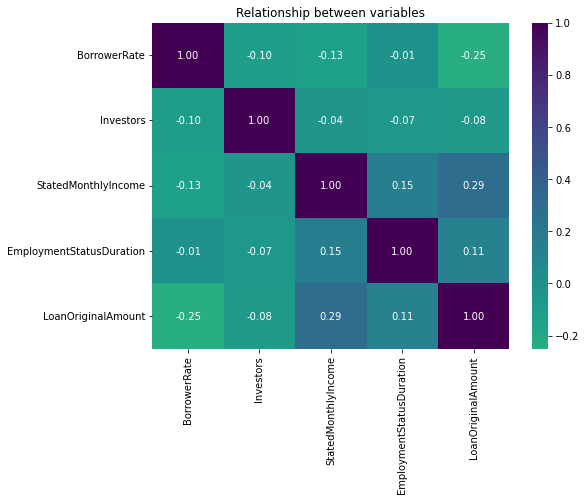

In [45]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis_r', center = 0);
plt.title('Relationship between variables')
plt.show()

In [48]:
loan_df_clean.to_csv('loan_df_clean.csv',index=False)  

<strong>This graph shows a positive correlation between loan original amount, stated monthly income, and employment status duration , indicating that these factors are taken into account when granting loans. Additionally, it shows that the original loan amount, investors, and borrower rate are all negatively correlated. </strong>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We found that some variables have a postive relationship such as loan original amount,stated monthly income and employment status duration.

### Were there any interesting or surprising interactions between features?

>There are some variables with negative relationship between loan original amount with  inverstors and borrower rate.

## Conclusions
>In conclusion, there are sufficient variables in the prosper loan data to analyze the relationship between loan amount, credit card payment, and other variables. We discovered that some variables are positively correlated while others are negatively correlated. Furthermore, we found that borrowers who failed to pay off their loans had a low-income range.